# Analysis of Job Salaries - Data Visualisation Project

This project is to analyse dataset that consists of a collection of salary information from different industries and countries to gain an insight into the job market trends, compensation analysis and help in your personal professional career. 
 
 Sourced from reputable employment websites and surveys, it includes details on job titles, salaries, job sectors, geographic locations, and more. Analyze this data to gain insights into job market trends, compare compensation across different professions, and make informed decisions about your career or hiring strategies. The dataset is cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes. The dataset is provided by a user from Kaggle (https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country) 

1. Are jobs paid the same in different countries?
2. Is education and salary co-related?
3. Do males or females have higher education level?
4. Does race/ethnicity play a role in salary?
5. What are the differences between seniors and juniors?

### Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot as plt 
plt.rcParams['figure.dpi']= 100

salary_data = pd.read_csv('Salary.csv')

In [3]:
salary_data.info()
salary_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   int64  
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 470.1+ KB


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45,Male,3,Manager,15.0,150000,Canada,White,1
3,36,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52,Male,2,Director,20.0,200000,USA,Asian,0


The dataset contains 6684 rows and 9 columns containing information on people from various countries, ethnicity, job title and etc. This dataset was cleaned and pre-processed for ease of analysis hence, there are no missing values.

Here's a quick summary of the columns:

- **Age**: Age of individual [years]
- **Gender**: Gender of the individual [M: Male, F: Female]
- **Educational Level**: Level of current education [0,1,2,3] 
(Unfortunately, there were no specifics given for education levels) 
- **Job Title**: Job title of individual
- **Years of Experience**: Years of experience in workforce [years]
- **Salary**: Current salary [$/year]
- **Country**: Country of workplace 
- **Race**: Ethnicity or race of individual
- **Senior**: Senior employee at current workplace [1: True, 0: False]



## Data Cleaning and Preparation

In [4]:
# Cleaning data
def clean_df_text(df):
    # renaming columns   
    df = df.rename({'Education Level':'Education'}, axis=1)
    df = df.rename({'Job Title':'Jobs'}, axis=1)
    df = df.rename({'Years of Experience':'Experience'}, axis=1)
    
    # clean the column name texts
    df.columns = df.columns.str.strip()
    
    # clean the row value texts
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.title()
            df[column] = df[column].str.strip()

    return df

# To add value labels on graph
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', weight = 'bold')

In [5]:
salary = clean_df_text(salary_data)
salary.head()

,Age,Gender,Education,Jobs,Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5.0,90000,Uk,White,0
1,28,Female,2,Data Analyst,3.0,65000,Usa,Hispanic,0
2,45,Male,3,Manager,15.0,150000,Canada,White,1
3,36,Female,1,Sales Associate,7.0,60000,Usa,Hispanic,0
4,52,Male,2,Director,20.0,200000,Usa,Asian,0


## Data Question 1: Are jobs paid the same in different countries?

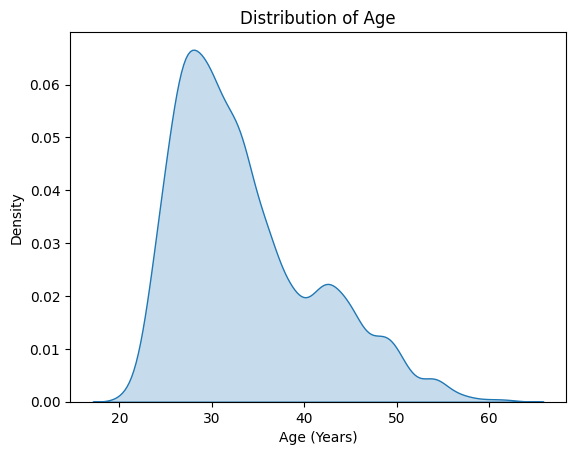

In [6]:
# Finding distribution of age in data 
sns.kdeplot(data = salary , x = 'Age', fill = True)
plt.xlabel('Age (Years)')
plt.title('Distribution of Age')
plt.show()

From the figure above, the graph peaks around the age of approximately 30 which means that majority of people in this database are within the age of approximately 30 years old. There is also a minor spike around the age of 42 years old. The youngest and oldest person is approximately 20 and 60 year old respectively. 

In [7]:
# Initial jobs count
jobs = salary.Jobs.value_counts().rename_axis('Jobs').reset_index(name='Count')
jobs.head(10)

,Jobs,Count
0,Software Engineer,809
1,Data Scientist,515
2,Data Analyst,391
3,Software Engineer Manager,376
4,Product Manager,323
5,Project Engineer,317
6,Marketing Manager,315
7,Full Stack Engineer,304
8,Front End Developer,270
9,Back End Developer,242


From the list above, majority of the top 10 most popular jobs are related to coding.

In [8]:
# Initial country count
country = salary.Country.value_counts().rename_axis('Countries').reset_index(name='Count')
country

,Countries,Count
0,Usa,1356
1,China,1339
2,Australia,1335
3,Uk,1332
4,Canada,1322


In [9]:
# Creating variables for job title and job count
job_title = []
job_count = []

for i in range(0, 6):
    job_title.append(jobs.Jobs[i])
    job_count.append(jobs.Count[i])

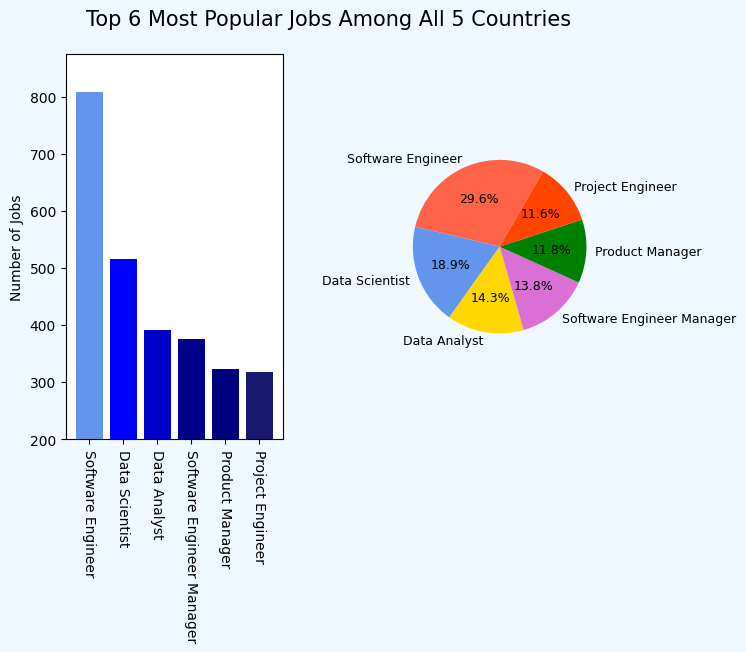

In [10]:
# Plotting graphs for top 6 jobs
fig = plt.figure(facecolor = 'aliceblue', figsize = (7, 5))
fig.suptitle("Top 6 Most Popular Jobs Among All 5 Countries", fontsize = 15, y = 0.97)

# Plotting bar graph
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.5,hspace=0.7)
plt.bar(x = job_title , height = job_count, color= ['cornflowerblue', 'blue', 'mediumblue', 'darkblue', 
                                                                                       'navy','midnightblue'] )
plt.xticks(rotation = -90)
plt.ylabel('Number of Jobs')
plt.ylim(200,875)

# Plotting pie chart 
plt.subplot(1,2,2)
plt.pie(x = job_count, labels = job_title, autopct = '%1.1f%%', startangle = 60, textprops ={'fontsize':9}
       , colors = ['tomato', 'cornflowerblue', 'gold', 'orchid', 'green', 'orangered'])
plt.show()

It appears that software engineer is the most popular job by a large margin, accounting for approximately 30% of the database, followed by data scientist and data analyst with approximately 19% and 14.3% respectively. Next is software engineer and product manager accounting for approximately 13.8% and 11.8% respectively and lastly is project engineer with 11.8%.

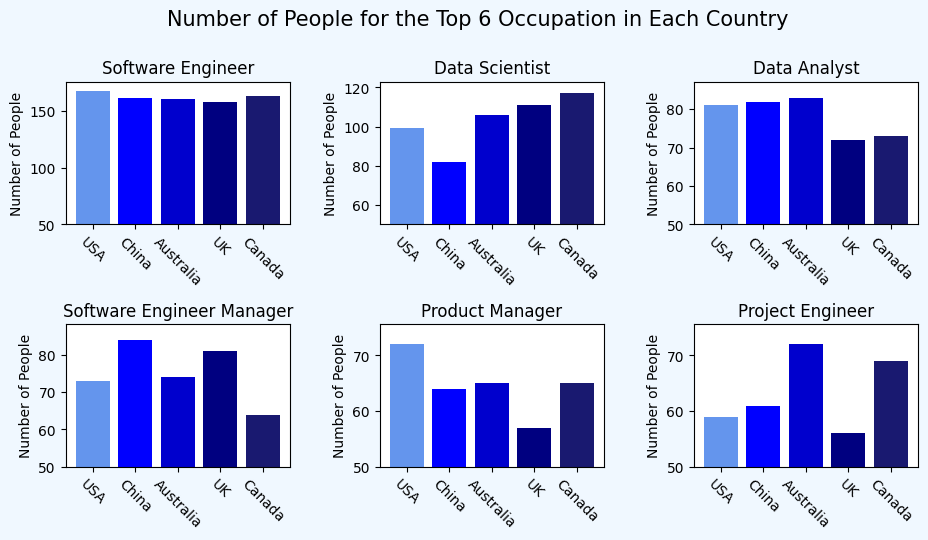

In [11]:
# Plotting bar charts for each job 
country_count = [0,0,0,0,0]
country_counter = 0
country_label = ['USA', 'China', 'Australia', 'UK', 'Canada']

fig = plt.figure(facecolor = 'aliceblue', figsize = (11, 5))
fig.suptitle("Number of People for the Top 6 Occupation in Each Country", fontsize = 15, y = 1.025)

for m in range(0,6):
    for i in range(0, len(country.Countries)):
        for n in range(0, len(salary)):
            if salary.Country[n] == country.Countries[i] and salary.Jobs[n] == jobs.Jobs[m]:
                country_count[country_counter] += 1
        country_counter += 1    
    plt.subplot(2,3, m+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.7)
    plt.bar(x = country_label, height = country_count, color= ['cornflowerblue', 'blue', 'mediumblue', 
                                                                                       'navy','midnightblue'])
    plt.xticks(rotation = -45)
    plt.ylabel('Number of People')
    plt.ylim(50)
    plt.title(jobs.Jobs[m])
    country_count = [0,0,0,0,0]
    country_counter = 0

plt.show()

The charts above shows the popularity of each occupation in each country. Unsurprisingly, software engineers are high in demand among all 6 countries as USA has a small lead in numbers. Data scientists are very popular in the UK and Canada but not in China. For data analysts, USA, China and Australia seem to have a high demand and fairly low in the UK and Canada. Software engineer managers in China are the most popular followed by the UK and Australia. For product managers and project engineers, USA and Australia have the highest demand respectively. 

In [12]:
# Finding average salary in each country
mean_salary = salary.groupby('Country')['Salary'].mean().round(1)
print(mean_salary)

Country
Australia    114925.5
Canada       116455.1
China        116282.6
Uk           115919.9
Usa          112998.8
Name: Salary, dtype: float64


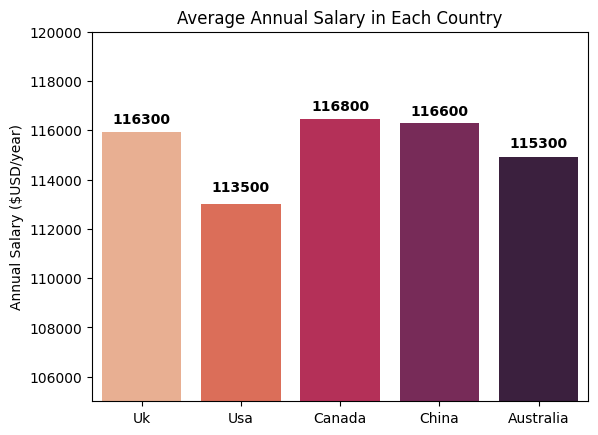

In [13]:
# Plotting bar chart for average salary in each country
sns.barplot(data = salary, x = 'Country', y = 'Salary', ci = None, palette = 'rocket_r')
plt.ylim(105000, 120000)
plt.xlabel('')
plt.ylabel('Annual Salary ($USD/year)')
plt.title('Average Annual Salary in Each Country')
y_label = (116300,113500,116800,116600,115300)

# Adding labels on top of each bar
addlabels(country.Countries, y_label) 
plt.show()

The average annual salary in Canada is the highest followed by China, approximately 116800 USD/year and 116600 USD/year. The UK has the third highest average annual salary with approximately 116300 USD/year. The lowest average annual salary in the USA is the lowest with approximately 113500 USD/year.

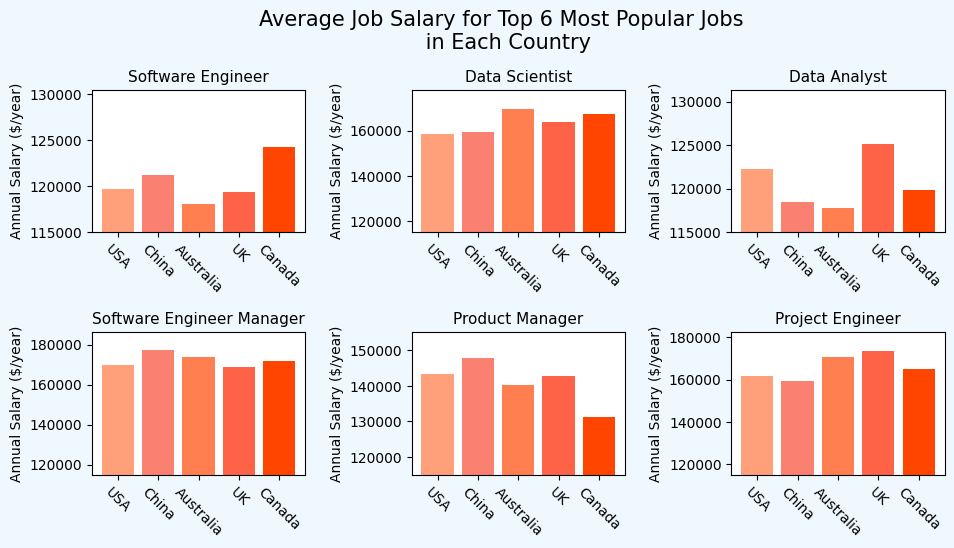

In [14]:
# Plotting average salary for each job
jobs_country = [0,0,0,0,0]
jobs_counter = [0,0,0,0,0]
salary_avg = []
counter = 0

fig = plt.figure(facecolor = 'aliceblue', figsize = (11, 5))
fig.suptitle("Average Job Salary for Top 6 Most Popular Jobs \n in Each Country", fontsize = 15, y = 1.04)

for i in range(0,6):
    for n in country.Countries:
        for m in range(0,len(salary)):
            if salary.Jobs[m] == jobs.Jobs[i] and salary.Country[m] == n:
                jobs_country[counter] += salary.Salary[m]
                jobs_counter[counter] += 1
        counter += 1
    for o in range(0, len(jobs_country)):
        salary_avg.append(jobs_country[o]/jobs_counter[o])
    plt.subplot(2,3,i+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.bar(x = country_label, height = salary_avg, color = ['lightsalmon', 'salmon', 'coral', 'tomato', 'orangered'])
    plt.title(jobs.Jobs[i], fontsize = 11)
    plt.ylabel('Annual Salary ($/year)')
    plt.xticks(rotation = -45)
    plt.ylim(115000)
    counter = 0
    jobs_country = [0,0,0,0,0]
    jobs_counter = [0,0,0,0,0]
    salary_avg = []
    
plt.show()

Although the number of software engineers are significantly higher, their salaries are much lower compared to the rest. For data scientists, software engineer manager and project engineer, the disparity of annual salary is fairly low in comparison. It seems that software engineers and data analyst have the highest salary disparity. Software engineers in Canada have a decently higher salary among the countries (approximately 125000 USD/year). In australia, they are paid the least, only approximately 117000 USD/year. Data analysts in the UK have the highest annual salary with approximately 125000 USD/year. However, in Australia, they are paid only an estimate of 117500 USD/year. Data scientists have an approximate salary of 162000 USD/year with Australia as the highest. Product managers in Canada are fairly underpaid compared to the rest with approximately 130000 USD/year whereas in China, they are paid much higher (148000 USD/year).

## Data Question 2: Is education and salary co-related?

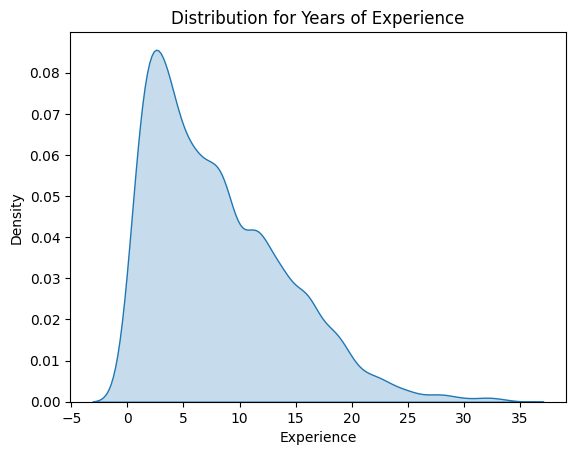

In [15]:
# Finding distribution for years of experience 
sns.kdeplot(data = salary, x = 'Experience', fill=True)
plt.title('Distribution for Years of Experience')
plt.show()

The majority of people have an experience of approximately 0 to 5 years and gradually decreases to approximately 20 years. There a small minority of people who have more than 20 years of experience, up to 35 years.

In [16]:
# Initial education count
education = salary.Education.value_counts().rename_axis('Education').reset_index(name='Count')
education

,Education,Count
0,1,3022
1,2,1857
2,3,1369
3,0,436


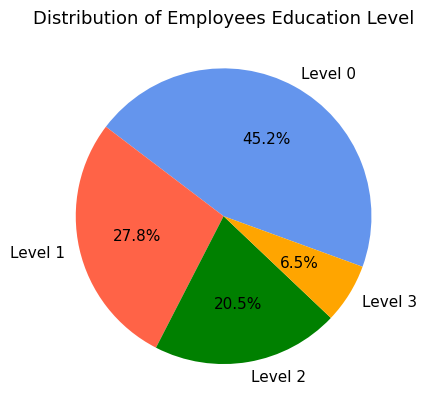

In [17]:
education_label = ['Level 0', 'Level 1', 'Level 2', 'Level 3']

# Plotting pie chart for education level
plt.pie(x = education.Count, labels = education_label, autopct = '%1.1f%%', textprops= {'fontsize':11}, startangle = -20, 
       colors = ['cornflowerblue', 'tomato', 'green', 'orange'])
plt.title('Distribution of Employees Education Level', fontsize = 13)
plt.show()

The figure above shows that almost 50% of people in this dataset have the lowest level of education and only 6.5% (Level 0) of people have the highest education level (Level 3). Approximately 28% of people have a level 1 education and 20.5% of people have a level 2 education.

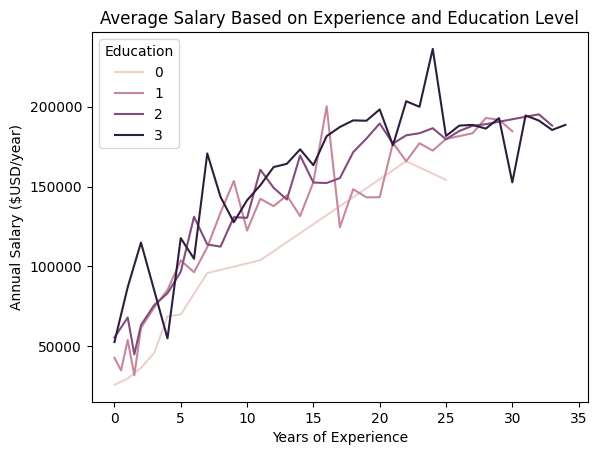

In [18]:
# Plotting line graph for salary against experience with different education level
palette_color = sns.cubehelix_palette(as_cmap=True)

sns.lineplot(data = salary, x = 'Experience', y = 'Salary', hue = 'Education', ci = None, palette = palette_color)
plt.xlabel('Years of Experience')
plt.ylabel('Annual Salary ($USD/year)')
plt.title('Average Salary Based on Experience and Education Level')
plt.show()

From the line graph above, it can be seen that there is a positive correlation between years of experience and annual salary for all 3 levels of education which is expected. For every increase in education level, the line also extends further with years of experience. For example, level 0 education only increases up to approximately 25 years of experience whereas, level 2 and 3 increases up to approximately 30 and 33 years of experience respectively. Lastly, level 3 education goes up to 34 years of experience. This might prove that education is essential to further advance in experience. In addition to that, the annual salary increases higher as education level increases. As shown in the graph, level 3's annual salary is generally higher throughout the range of experience compared to the rest. However, as experience reaches 25 years, annual salary for level 1 to 3 is approximately the same at 180000 USD/year. Lastly, an unexpected drop occurs for level 3 at 30 years of experience from 180000 USD/year to 150000 USD/year. This might be an outlier as there are very few data at that experience.

## Data Question 3: Do males or females have a higher education level?

In [19]:
# Initial count for gender
gender = salary.Gender.value_counts().rename_axis('Gender').reset_index(name='Count')
gender

,Gender,Count
0,Male,3671
1,Female,3013


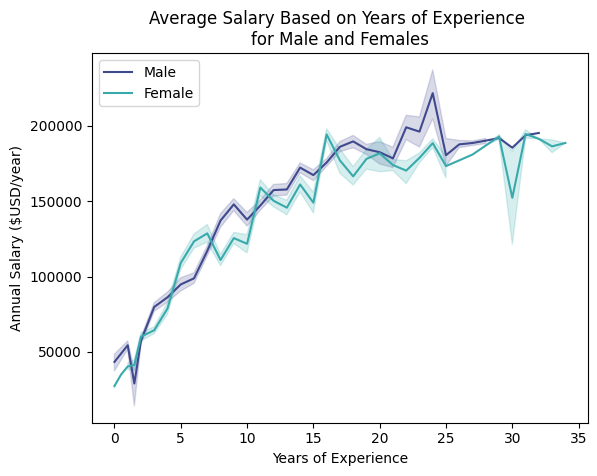

In [20]:
# Plotting line chart of average salary for male and females
sns.lineplot(data = salary, x = 'Experience', y = 'Salary', hue= 'Gender', palette = 'mako')
plt.xlabel('Years of Experience')
plt.ylabel('Annual Salary ($USD/year)')
plt.title('Average Salary Based on Years of Experience \nfor Male and Females')
plt.legend(loc = 'upper left')
plt.show()

The graph above represents the average annual salary of male and female workers as years of experience increases. There seems to be a logarithmic increase for annual salary with experience. Salary generally increases linearly from 0 to 5 years of experience but gradually plateaus at 200000 USD/year once experience reaches approximately 17 to 35 years. 

In [21]:
# Finding education levels in male and female
male_education = [0,0,0,0]
female_education = [0,0,0,0]
edu_counter = 0

for i in education.Education:
    for n in range(0, len(salary)):
        if salary.Gender[n] == 'Male' and salary.Education[n] == i:
            male_education[edu_counter] += 1
        elif salary.Gender[n] == 'Female' and salary.Education[n] == i:
            female_education[edu_counter] += 1
    edu_counter += 1

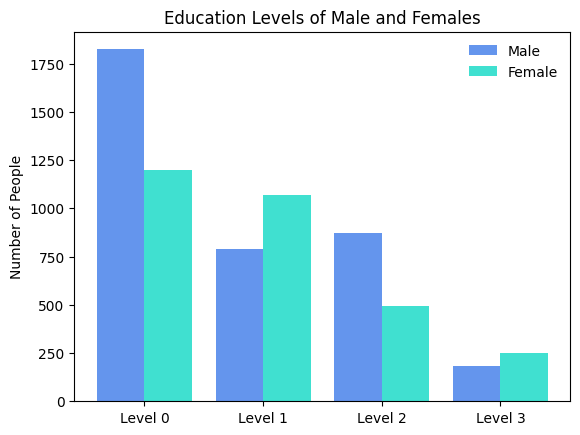

In [22]:
# Plotting bar charts for education levels in male and female 
x_axis = np.arange(len(education_label))
plt.bar(x_axis - 0.2, male_education, width = 0.4, color = 'cornflowerblue')
plt.bar(x_axis + 0.2, female_education, width = 0.4, color = 'turquoise')
plt.xticks(x_axis, education_label)
plt.legend(['Male', 'Female'] ,frameon = False, loc = ('upper right'))
plt.ylabel('Number of People')
plt.title('Education Levels of Male and Females')
plt.show()

As level of education increases, the number of people for both male and female generally decreases. The number of men in level 0 and level 2 are higher than women. In level 0, the number of men and female is approximately 1800 and 1200 respectively and in level 2, it is approximately 850 and 500 respectively. There is a small number of people in level 3 with approximately 200 and 250 for male and females respectively. 

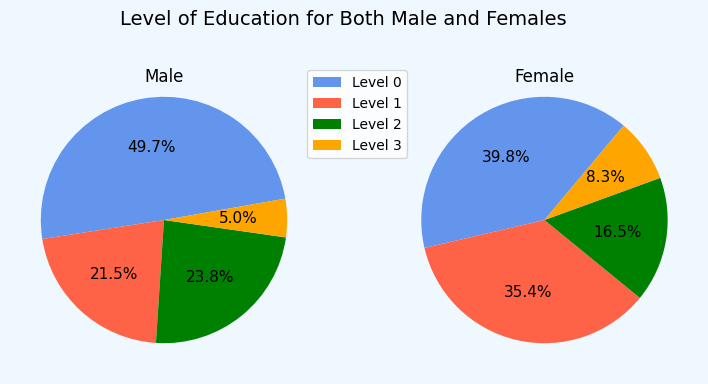

In [23]:
# Plotting pie charts for level of education for male and females
fig = plt.figure(facecolor = 'aliceblue', figsize = (9, 4))
fig.suptitle("Level of Education for Both Male and Females", fontsize = 14, y = 1.02)

plt.subplot(1,2,1)
plt.pie(x = male_education, autopct = '%1.1f%%', textprops= {'fontsize':11}, startangle = 10, colors = 
       ['cornflowerblue', 'tomato', 'green', 'orange'])
plt.title('Male', fontsize = 12, y = 0.92)
plt.subplots_adjust(wspace=0.2,hspace=0.7)

plt.subplot(1,2,2)
plt.pie(x = female_education, autopct = '%1.1f%%', textprops= {'fontsize':11}, startangle = 50, colors = 
       ['cornflowerblue', 'tomato', 'green', 'orange'])
plt.title('Female', fontsize = 12, y = 0.92)
plt.legend(education_label, loc = (-0.27,0.7))
plt.show()

About 50% of men and 40% of women have an education level of 0. Females tend to have a higher percentage who pursue a higher education with approximaetly 35% of all females have a level 3 education. Approximately 45% of men have a education level greater than 2 whilst females have a slightly higher percentage of approximately 51%.

## Data Question 3: Does race/ethnicity play a role in salary?

In [24]:
# Initial race count
race = salary.Race.value_counts().rename_axis('Race').reset_index(name='Count')
race

,Race,Count
0,White,1957
1,Asian,1599
2,Korean,457
3,Australian,452
4,Chinese,443
5,Black,435
6,African American,352
7,Mixed,334
8,Welsh,333
9,Hispanic,322


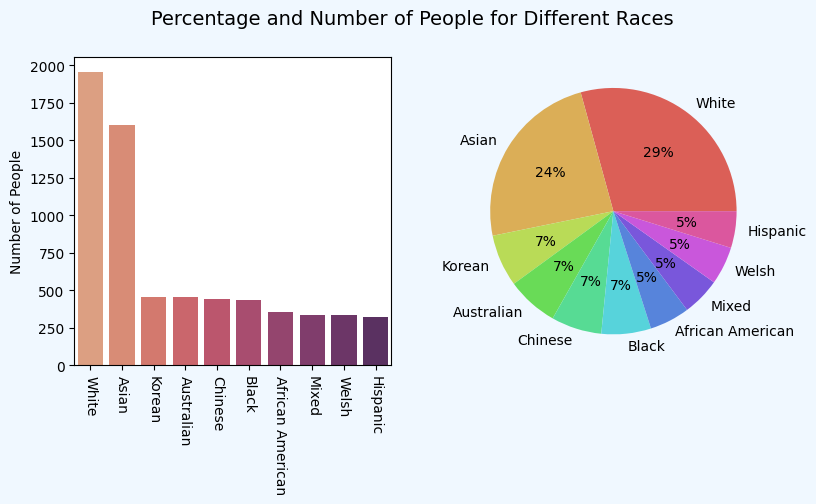

In [25]:
# Plotting bar chart for no. of people for each race

fig = plt.figure(facecolor = 'aliceblue', figsize = (9, 4))
fig.suptitle("Percentage and Number of People for Different Races", fontsize = 14, y = 1.0)

plt.subplot(1,2,1)
sns.barplot(data = race, x = 'Race', y = 'Count', palette = 'flare')
plt.xlabel('')
plt.ylabel('Number of People')
plt.xticks(rotation = -90)

palette_pie = sns.color_palette("hls", 10)
plt.subplot(1,2,2)
plt.pie(x = race.Count, labels = race.Race, autopct = '%1.0f%%', colors = palette_pie)
# plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

plt.show()

In this dataset, majority of people are white and asians. People who are white take up approximately 29% of this data and asians account for 24% which combined is more than 50%. Welsh and Hispanics have the lowest numbers with an estimate of 400 people.

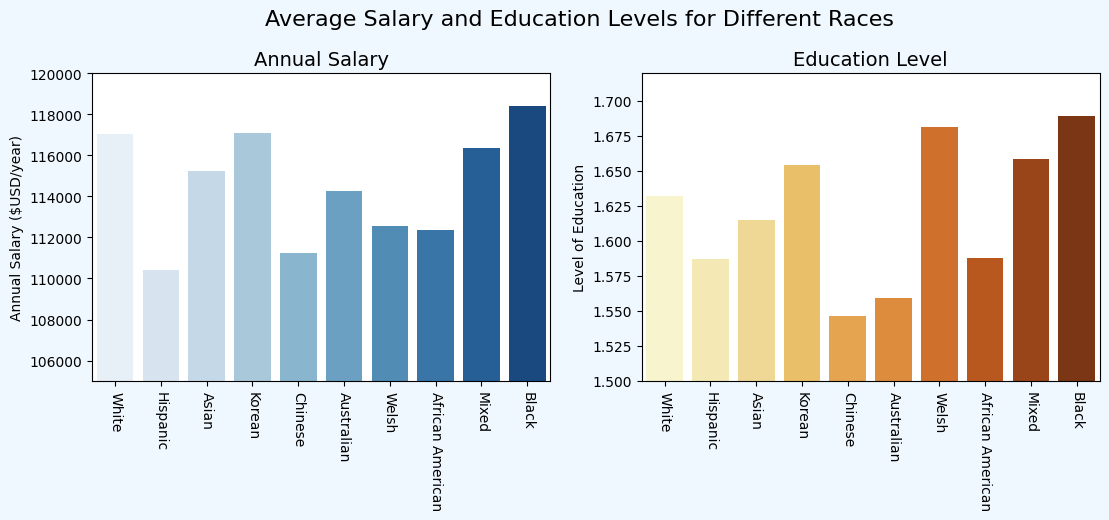

In [26]:
# Plotting bar charts for average salary and education level among race
fig = plt.figure(facecolor = 'aliceblue', figsize = (13, 4))
fig.suptitle("Average Salary and Education Levels for Different Races", fontsize = 16, y = 1.04)

plt.subplot(1,2,1)
sns.barplot(data = salary, x = 'Race', y = 'Salary', ci = None, palette = 'Blues')
plt.title('Annual Salary', fontsize = 14)
plt.xticks(rotation = -90)
plt.ylim(105000, 120000)
plt.xlabel('')
plt.ylabel('Annual Salary ($USD/year)')

plt.subplot(1,2,2)
sns.barplot(data = salary, x = 'Race', y = 'Education',ci= None, palette = 'YlOrBr')
plt.title('Education Level', fontsize = 14)
plt.ylabel('Level of Education')
plt.ylim(1.5, 1.72)
plt.xlabel('')
plt.xticks(rotation = -90)
plt.show()

Black people seem to have the highest annual average salary with approximately 118000 USD/year even though the percentage of Black people is significantly lower than the majority. Koreans are the second highest paid with roughly 117000 USD/year and White people is a close third. Hispanics are the lowest paid race with only 111000 USD/year. By comparing both bar charts above, there is an obvious trend between annual salary and education level. Average annual salary tends to increase as education level increases in each race. However, there a few of exceptions in Chinese, Australians and more obviously in Welsh people. Even though the Welsh have one of the highest education levels, there are paid much lower compared to the others. Despite that, there is generally a positive trend between education and salary which answers that race has little to do with salary and that education is a more prominent factor.

## Data Question 5: What are the differences between seniors and juniors?

In [27]:
# Initial senior count
senior = salary.Senior.value_counts().rename_axis('Seniors').reset_index(name='Count')
senior

,Seniors,Count
0,0,5725
1,1,959


In [28]:
# Finding average experience and age of seniors
senior_experience_list = []
senior_age_list = []
senior_salary = []
junior_experience_list = []
junior_age_list = []
junior_salary = []

for i in range(0, len(salary)):
    if salary.Senior[i] == 1:
        senior_experience_list.append(salary.Experience[i])
        senior_age_list.append(salary.Age[i])
        senior_salary.append(salary.Salary[i])
    elif salary.Senior[i] == 0:
        junior_experience_list.append(salary.Experience[i])
        junior_age_list.append(salary.Age[i])
        junior_salary.append(salary.Salary[i])    
        
senior_experience = sum(senior_experience_list)/senior.Count[1]
senior_age = sum(senior_age_list)/senior.Count[1]

junior_experience = sum(junior_experience_list)/senior.Count[0]
junior_age = sum(junior_age_list)/senior.Count[0]

print('The average number of years of experience for seniors and juniors is approximately', 
      str(round(senior_experience,2)), 'years and', round(junior_experience,2), 'years respectively.')
print('The average age of senior and junior employees is approximately', round(senior_age, 2), 'years and', round(junior_age,2),
      'years respectively.')

The average number of years of experience for seniors and juniors is approximately 12.76 years and 7.29 years respectively.
The average age of senior and junior employees is approximately 39.81 years and 32.57 years respectively.


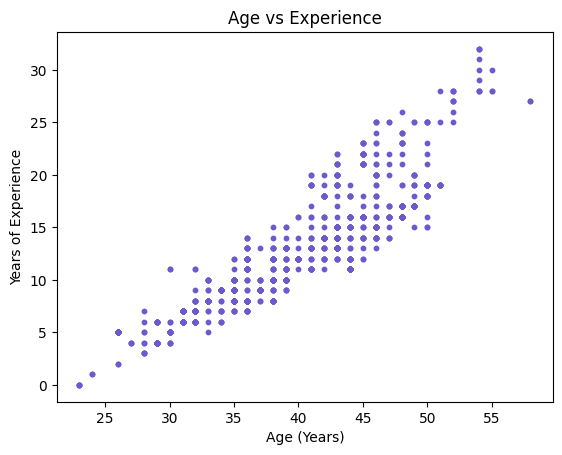

In [29]:
# Plotting scatterplot for age, experience and salary among seniors
plt.scatter(senior_age_list, senior_experience_list, s = 10, color = 'slateblue')
plt.xlabel('Age (Years)')
plt.ylabel('Years of Experience')
plt.title('Age vs Experience')
plt.subplots_adjust(wspace=0.4,hspace=0.7)

There is a general positive linear trend for years of experience and age as expected. There are more workers between the age of 35 to 50 years old. The distribution of experience between those ages increases as well. For comparison, at age 35, the distribution of age is approximately between 6 and 11 years of experience whereas at age 50, the distribution is between 15 and 25 years. Experience reaches its peak at approximately 33 years at age 55 years old.

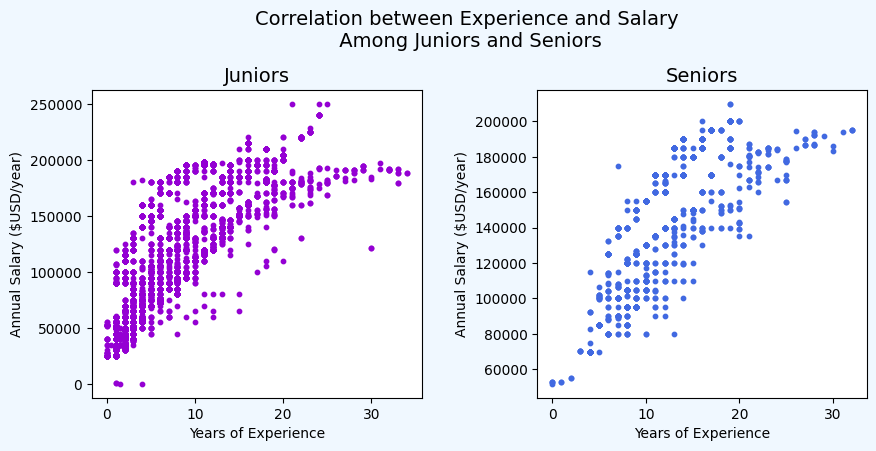

In [30]:
# Plotting scatterplot for experience and salary among juniors
fig = plt.figure(facecolor = 'aliceblue', figsize = (10, 4))
fig.suptitle("Correlation between Experience and Salary\n Among Juniors and Seniors", fontsize = 14, y = 1.08)
plt.subplots_adjust(wspace=0.35,hspace=0.7)

plt.subplot(1,2,1)
plt.scatter(junior_experience_list, junior_salary, s = 10,color = 'darkviolet')
plt.xlabel('Years of Experience')
plt.ylabel('Annual Salary ($USD/year)')
plt.title('Juniors', fontsize = 14)

plt.subplot(1,2,2)
plt.scatter(senior_experience_list, senior_salary, s = 10, color = 'royalblue')
plt.title('Seniors', fontsize = 14)
plt.xlabel('Years of Experience')
plt.ylabel('Annual Salary ($USD/year)')
plt.show()

There is much more data for juniors than seniors hence, the first figure (left) is more saturated and scattered than the second one (right). Generally, there is a positive trend between years of experience and annual salary as expected. However, for juniors, salary seemes to plataeu after 20 years of experience at approximately 190000 USD/year whereas for seniors, annual salary seems to continue to increase. The distribution of salary is significantly wider in juniors than seniors from 0 to 20 years of experience. At 10 years of experience, annual salary ranges from approximately 50000 USD/year to 200000 USD/year for juniors. For seniors, the annual salary is between 80000 USD/year to 160000 USD/year, excluding outliers. The juniors graph has a higher peak than in the seniors graph. However, this could be a result of outliers where the occupation is really niche or specific. 

## Conclusion

During this project, we aimed to answer questions regarding the job market and employment trends. It was found that software engineers are one of the most popular, if not the most popular job currently. However, despite the demand, they are not paid as much as other jobs such as data scientists or project engineers. Every job's salary will vary depending on the location of work and experience. On average, workers in Canada are paid more in general, followed by China and the United Kingdom. Unfortunately, workers in the United States are generally underpaid in comparison to other countries. It was also found that education plays a role in education and salary. People with higher education tend to have higher salaries and experience overall. In general, women tend to pursue higher education than men. In addition to that, Black people has the highest average education level among various ethnicities, followed by the Welsh and Koreans. Lastly, it was determined that people in a senior position have a higher annual salary as experience increases. However, it is possible to have an equal or higher salary than seniors with less experience. 